In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


In [2]:
ds_sxd = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-09_glimmer_steady_state_base/case_10_full_power_change_in_length')
ds_cd = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-09_glimmer_steady_state_base/case_16_disable_PI')

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [3]:
# ds_fin = ds.isel(t=-1)
def plot_te_ne_nd(ds, title = ''):
    
    ds = ds.isel(t=-1)
    Te = replace_guards(np.ravel(ds['Te']))
    Ne = replace_guards(np.ravel(ds['Ne']))
    Nd = replace_guards(np.ravel(ds['Nd']))
    y = ds['y'][1:-1]

    fig,ax = plt.subplots(1,1, figsize = (12,6))
    ax.plot(y,Te, label = 'Te')
    ax.set_ylabel('Te (eV)')
    ax.set_xlabel(rf'S$_\parallel$ (m)')
    ax2 = ax.twinx()

    ax2.plot(y,Ne, label = 'Ne', color = 'red')
    ax2.plot(y,Nd, label = 'Nd', color = 'green', linestyle = '--')
    ax2.set_yscale('log')
    ax2.grid(False)
    ax2.set_ylabel(rf'Ne, Nd (m$^-3$)')

    if title != '':
        ax.set_title(title)

    fig.legend()

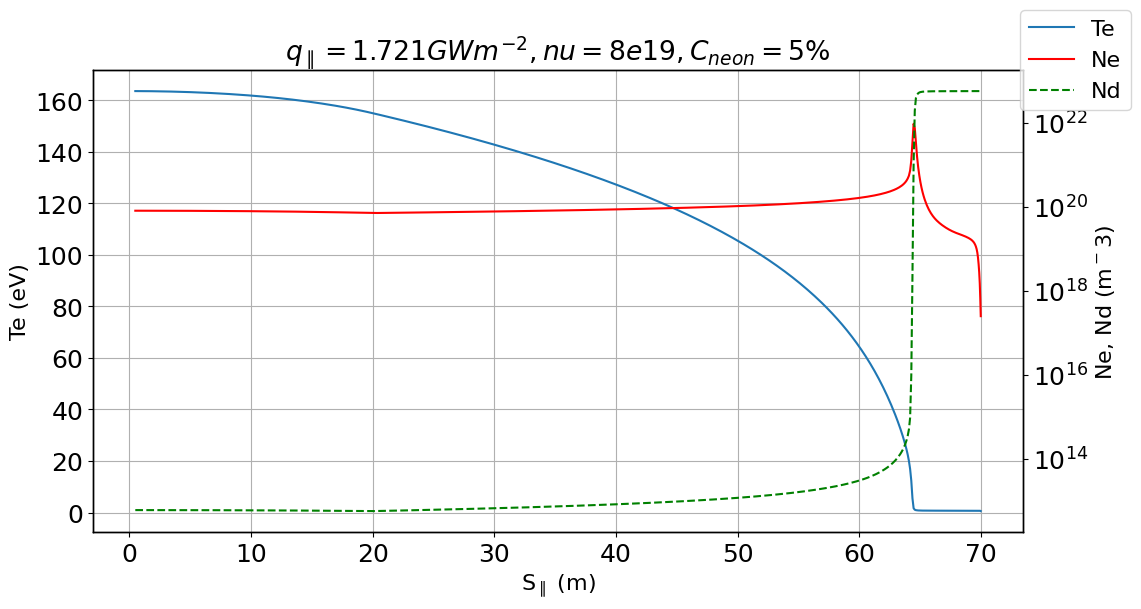

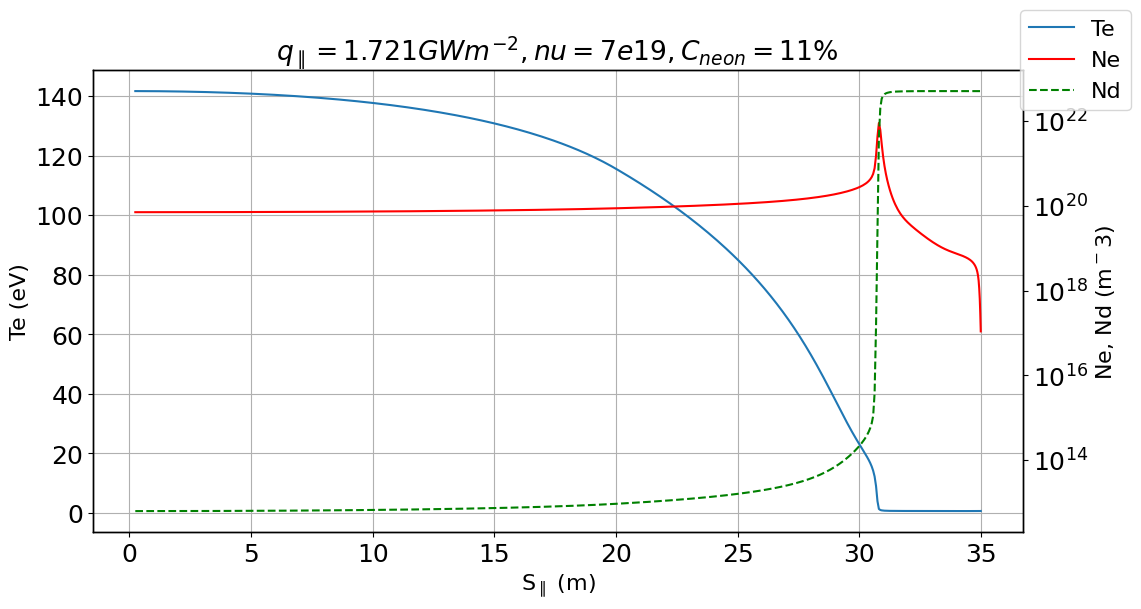

In [4]:
plot_te_ne_nd(ds_sxd, r'$q_\parallel = 1.721GWm^{-2}, nu = 8e19, C_{neon} = 5\%$ ')
plot_te_ne_nd(ds_cd, r'$q_\parallel = 1.721GWm^{-2}, nu = 7e19, C_{neon} = 11\%$ ')

In [5]:
def detachment_front_finder(ds):
    ds = ds.isel(t=-1)
    Nd = replace_guards(np.ravel(ds['Nd']))
    Ne = replace_guards(np.ravel(ds['Ne']))
    y = ds['y'][1:-1]
    front_loc = y[np.where(Nd > Ne)[0][0]]

    return y[-1].values - front_loc.values

In [6]:
detachment_front_finder(ds_sxd), detachment_front_finder(ds_cd)

(5.422200000000018, 4.127418750000004)

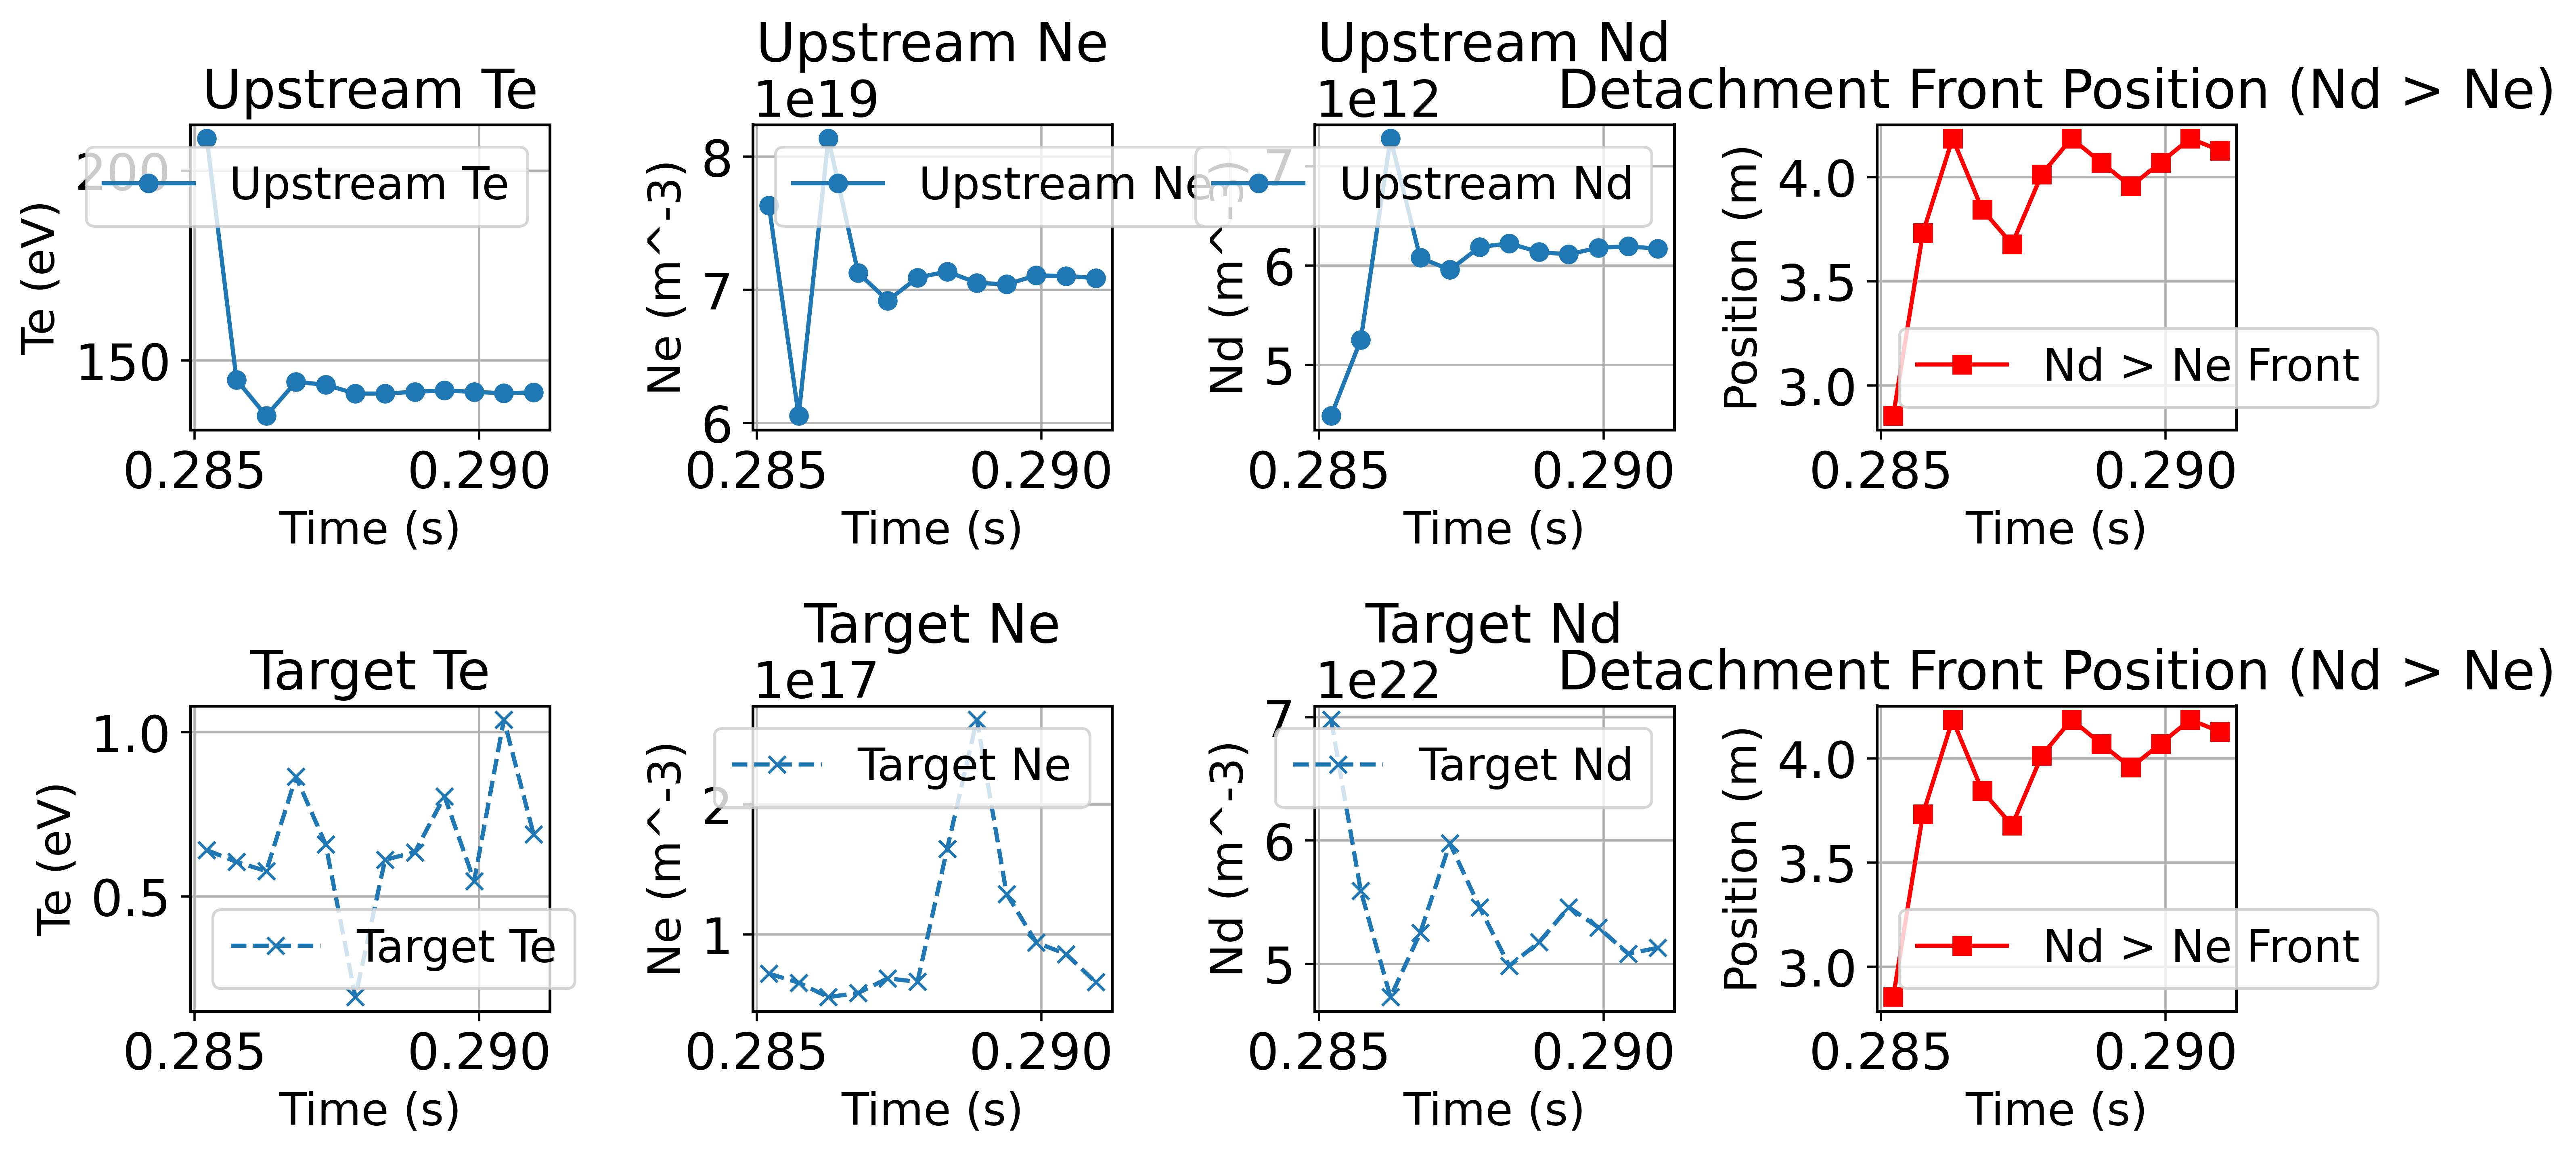

In [8]:
plot_time_history(ds_sxd, variables=['Te', 'Ne', 'Nd'], track_detachment_front=True, time_slices=2000)